In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing

In [3]:
ogdata = pd.read_csv("Hotel Reservations.csv")

ogdata.head()

len(ogdata.index)

36275

In [4]:
ogdata = ogdata.dropna()

len(ogdata.index)

36275

<Axes: xlabel='booking_status', ylabel='count'>

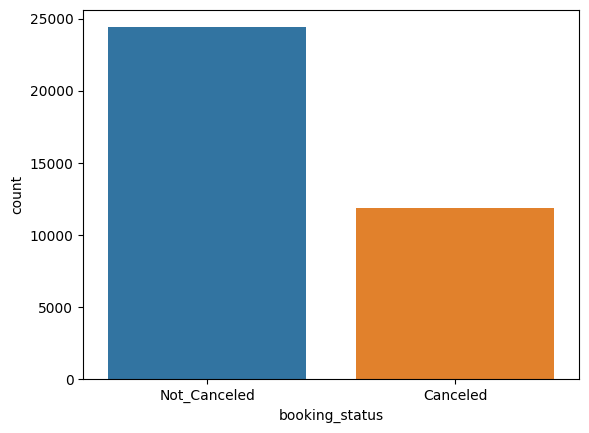

In [5]:
sns.countplot(x = ogdata["booking_status"])

They usually only let adults book hotel rooms so we can check to see how many rows have the number of adults equal to zero.

In [6]:
count = 0
for i in ogdata['no_of_adults']:
  
  if i == 0:
    count = count + 1

print(count)

139


In [12]:
data = ogdata[["no_of_weekend_nights", "no_of_week_nights", "room_type_reserved", "lead_time", "avg_price_per_room", "booking_status"]]

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
print(X)

[[1 2 'Room_Type 1' 224 65.0]
 [2 3 'Room_Type 1' 5 106.68]
 [2 1 'Room_Type 1' 1 60.0]
 ...
 [2 6 'Room_Type 1' 148 98.39]
 [0 3 'Room_Type 1' 63 94.5]
 [1 2 'Room_Type 1' 207 161.67]]


In [14]:
print(y)

['Not_Canceled' 'Not_Canceled' 'Canceled' ... 'Not_Canceled' 'Canceled'
 'Not_Canceled']


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 2 224 65.0]
 [1.0 0.0 0.0 ... 3 5 106.68]
 [1.0 0.0 0.0 ... 1 1 60.0]
 ...
 [1.0 0.0 0.0 ... 6 148 98.39]
 [1.0 0.0 0.0 ... 3 63 94.5]
 [1.0 0.0 0.0 ... 2 207 161.67]]


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)

[1 1 0 ... 1 0 1]


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Create the MLPClassifier object
mlp = MLPClassifier(max_iter=1000, activation = "logistic", alpha = "0.013093252195558758", hidden_layer_sizes = 89, learning_rate = "adaptive", solver = "lbfgs")

# Define the hyperparameter distributions to search over
param_dist = {
    'hidden_layer_sizes': sp_randint(10, 101),
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': uniform(0.0001, 0.1),
}

# Create the RandomizedSearchCV object
n_iter_search = 10 # Number of parameter settings to sample
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and their score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'activation': 'logistic', 'alpha': 0.013093252195558758, 'hidden_layer_sizes': 89, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Best score: 0.7888314376839631


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fitting the model

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, activation = "logistic", alpha = 0.013093252195558758, hidden_layer_sizes = 89, learning_rate = "adaptive", solver = "lbfgs")

mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.013093252195558758,
              hidden_layer_sizes=89, learning_rate='adaptive', max_iter=1000,
              solver='lbfgs')

In [22]:
pred = mlp.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, pred)

array([[1930, 1677],
       [ 541, 6735]])

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      3607
           1       0.80      0.93      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.79      0.73      0.75     10883
weighted avg       0.79      0.80      0.78     10883



In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.7303583275937251

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
knn_preds = knn.predict(X_test)

roc_auc_score(y_test, knn_preds)

0.7417506816277005

In [28]:
confusion_matrix(y_test, knn_preds)

array([[2150, 1457],
       [ 819, 6457]])

In [29]:
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65      3607
           1       0.82      0.89      0.85      7276

    accuracy                           0.79     10883
   macro avg       0.77      0.74      0.75     10883
weighted avg       0.79      0.79      0.79     10883

